In [1]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Complete-Deep-Learning/master/ANN/Churn_Modelling.csv")

In [6]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
#eda
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
#drop unncessary columns
data = df.drop(['RowNumber','CustomerId','Surname'],axis = 1)

In [11]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [15]:
#split the data and dummy variables
X = data.drop('Exited',axis=1)
y = data.Exited


In [17]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [18]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [19]:

X=pd.concat([X,geography,gender],axis=1)

In [20]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
#ANN
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [24]:
#initialing ann
classifier = Sequential()

In [28]:
classifier.add(Dense(units = 6,kernel_initializer='he_uniform', activation = 'relu',input_dim = 11))
classifier.add(Dropout(0.3))

In [29]:
classifier.add(Dense(units = 6,kernel_initializer='he_uniform', activation = 'relu',input_dim = 11))
classifier.add(Dropout(0.2))

In [30]:
classifier.add(Dense(units =1,kernel_initializer='glorot_uniform',activation = 'sigmoid'))
classifier.add(Dropout(0.1))

In [31]:
#compling the ann

In [32]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

In [33]:
#fittinh into training set


In [41]:
model = classifier.fit(X_train,y_train,validation_split=0.22,batch_size = 10, epochs = 100)

Epoch 1/100
624/624 [==============================] - 5s 3ms/step - loss: 1.1601 - accuracy: 0.6245 - val_loss: 0.5169 - val_accuracy: 0.7989
Epoch 2/100
624/624 [==============================] - 2s 3ms/step - loss: 0.7702 - accuracy: 0.7736 - val_loss: 0.5011 - val_accuracy: 0.7989
Epoch 3/100
624/624 [==============================] - 2s 3ms/step - loss: 0.7729 - accuracy: 0.7929 - val_loss: 0.4947 - val_accuracy: 0.7989
Epoch 4/100
624/624 [==============================] - 2s 3ms/step - loss: 0.7917 - accuracy: 0.7946 - val_loss: 0.4913 - val_accuracy: 0.7989
Epoch 5/100
624/624 [==============================] - 2s 3ms/step - loss: 0.7836 - accuracy: 0.7941 - val_loss: 0.4808 - val_accuracy: 0.7989
Epoch 6/100
624/624 [==============================] - 2s 2ms/step - loss: 0.7574 - accuracy: 0.7957 - val_loss: 0.4786 - val_accuracy: 0.7989
Epoch 7/100
624/624 [==============================] - 2s 3ms/step - loss: 0.7100 - accuracy: 0.7989 - val_loss: 0.4642 - val_accuracy: 0.7994

In [43]:
# list all data in history

print(model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

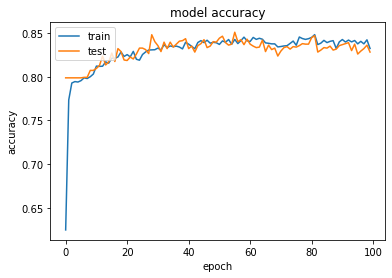

In [48]:
# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

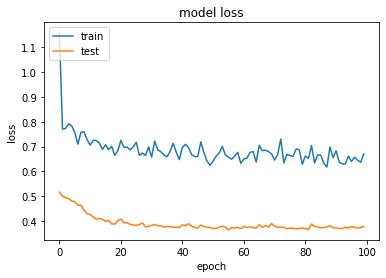

In [49]:
# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [51]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [52]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [53]:
score

0.833

In [54]:
cm

array([[1588,    7],
       [ 327,   78]])